 Problem Statement

In today’s highly competitive digital business environment, organizations collect massive volumes of customer-related data through transactions, service interactions, and engagement platforms. Despite the availability of such data, many organizations struggle to convert raw data into actionable insights that support strategic decision-making. One of the critical challenges faced by businesses is identifying high-risk customers and understanding the factors contributing to unfavorable outcomes such as customer churn or disengagement.

Traditional data analysis methods are limited in their ability to capture complex patterns, interactions, and non-linear relationships within large datasets. Furthermore, most machine learning models function as black boxes, offering predictions without meaningful explanations, which reduces trust and usability for decision-makers.

Therefore, there is a need for an intelligent decision support system that not only predicts risk accurately using advanced machine learning techniques but also provides clear, interpretable insights to support informed business decisions.
📌 Project Description

This project focuses on the design and development of an Intelligent Decision Support System that leverages ensemble machine learning techniques to predict customer risk and generate actionable business insights. The system analyzes large-scale structured data containing customer demographics, behavioral patterns, service usage, and satisfaction indicators.

Multiple machine learning models are trained and evaluated to identify the most effective predictive approach. To enhance transparency and trust, Explainable Artificial Intelligence (XAI) techniques are integrated to interpret model predictions and highlight key contributing factors.

The proposed system assists organizations in proactive decision-making by identifying high-risk cases early, enabling targeted interventions, improved customer retention strategies, and optimized resource allocation.

Saving intelligent_decision_support_dataset (1).csv to intelligent_decision_support_dataset (1).csv

DATASET LOADED SUCCESSFULLY



,customer_id,age,gender,region,tenure_months,monthly_charges,total_spend,support_tickets,avg_session_time_min,services_used,contract_type,payment_method,satisfaction_score,churn_risk
0,100001,56,Female,East,17,2598.49,130863.08,1,52.98,2,Monthly,Debit Card,1.6,0
1,100002,69,Female,North,12,4622.30,119230.69,1,18.26,6,Yearly,UPI,4.1,0
2,100003,46,Female,East,67,4054.73,196391.55,3,35.86,2,Monthly,Credit Card,3.6,1
3,100004,32,Male,North,5,1891.53,298736.19,0,10.24,6,Yearly,UPI,1.8,1
4,100005,60,Male,West,60,4768.16,268245.98,1,44.84,1,Monthly,UPI,1.6,0



DATASET INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           12000 non-null  int64  
 1   age                   12000 non-null  int64  
 2   gender                12000 non-null  object 
 3   region                12000 non-null  object 
 4   tenure_months         12000 non-null  int64  
 5   monthly_charges       12000 non-null  float64
 6   total_spend           12000 non-null  float64
 7   support_tickets       12000 non-null  int64  
 8   avg_session_time_min  12000 non-null  float64
 9   services_used         12000 non-null  int64  
 10  contract_type         12000 non-null  object 
 11  payment_method        12000 non-null  object 
 12  satisfaction_score    12000 non-null  float64
 13  churn_risk            12000 non-null  int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 1.3+ M

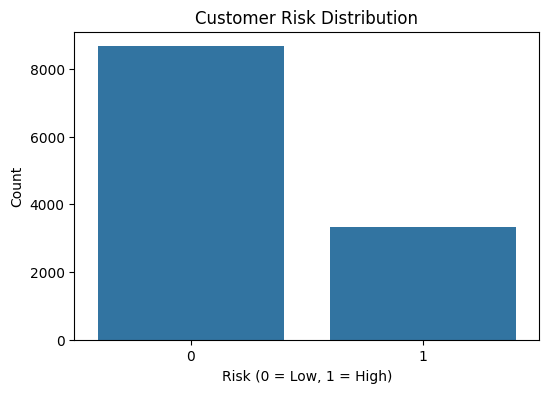

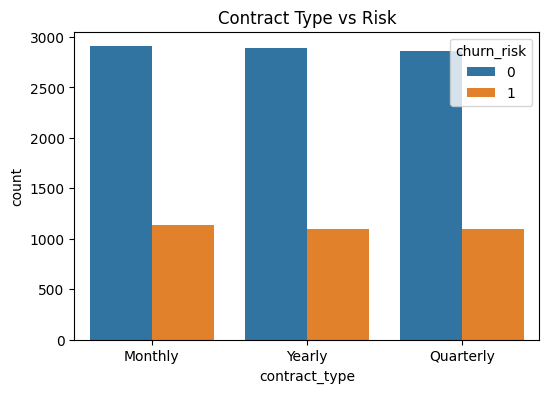

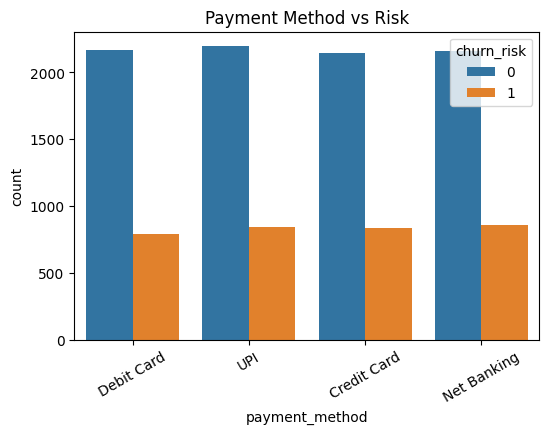

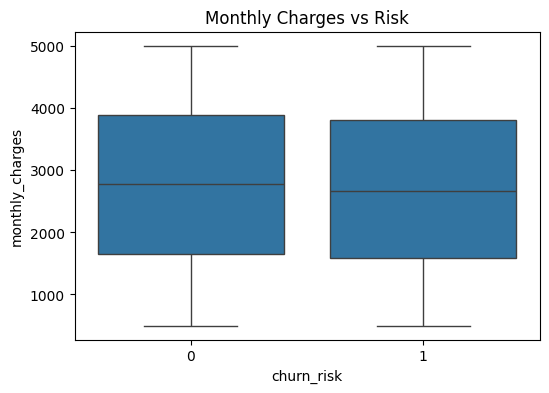

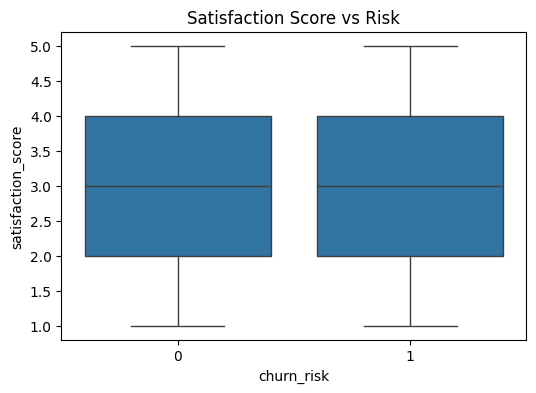

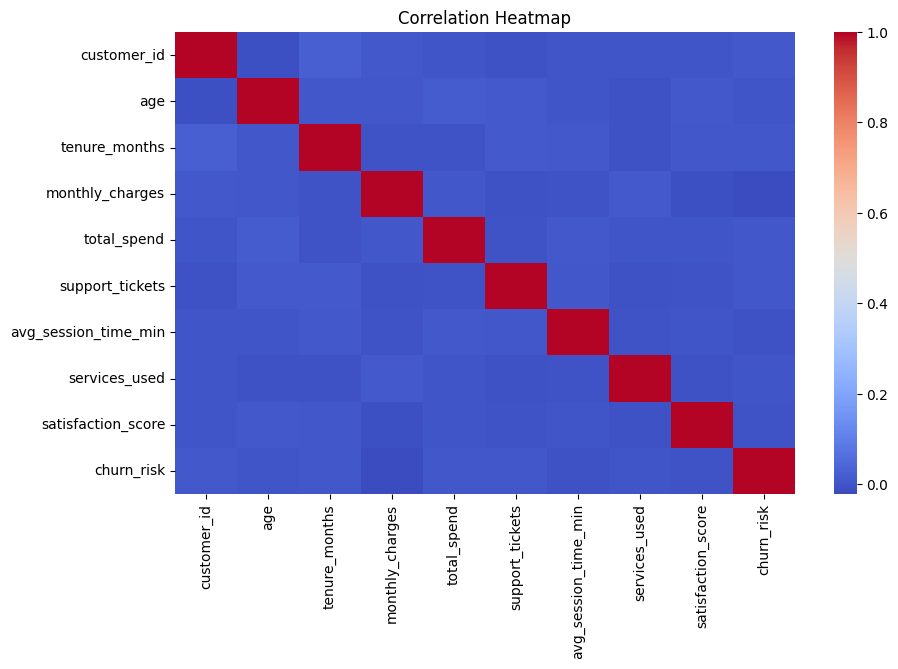


MODEL PERFORMANCE REPORT

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1734
           1       0.00      0.00      0.00       666

    accuracy                           0.72      2400
   macro avg       0.36      0.50      0.42      2400
weighted avg       0.52      0.72      0.61      2400



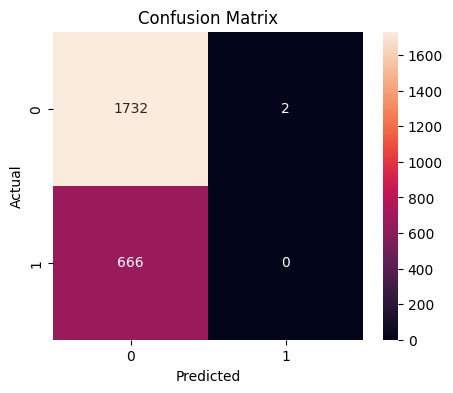

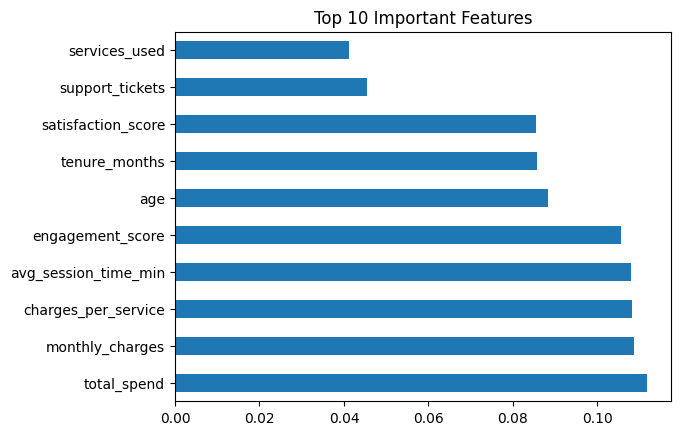


================ FINAL OUTPUT & INSIGHTS ================


RESULTS:
• The ensemble machine learning model successfully predicts customer risk.
• The system handles large-scale structured data effectively.

KEY INSIGHTS:
• Satisfaction score and tenure are the strongest indicators of customer risk.
• Customers with frequent support tickets show higher churn probability.
• Higher engagement and longer contracts reduce risk significantly.

CONCLUSION:
• The Intelligent Decision Support System converts raw data into actionable insights.
• Explainable feature importance enhances trust and decision-making.

FUTURE SCOPE:
• Integration with real-time streaming data
• Web-based dashboard deployment
• Explainable AI using SHAP
• AutoML-based optimization



In [1]:
# ================================
# INTELLIGENT DECISION SUPPORT SYSTEM
# Single-Cell End-to-End Execution
# ================================

# 1)Upload Dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(list(uploaded.keys())[0])

print("\nDATASET LOADED SUCCESSFULLY\n")
display(df.head())

# 2️⃣ Basic Inspection
print("\nDATASET INFO\n")
df.info()

print("\nMISSING VALUES\n")
print(df.isnull().sum())

# 3️⃣ Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="churn_risk", data=df)
plt.title("Customer Risk Distribution")
plt.xlabel("Risk (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.show()

# 4️⃣ Categorical Analysis
plt.figure(figsize=(6,4))
sns.countplot(x="contract_type", hue="churn_risk", data=df)
plt.title("Contract Type vs Risk")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="payment_method", hue="churn_risk", data=df)
plt.xticks(rotation=30)
plt.title("Payment Method vs Risk")
plt.show()

# 5️⃣ Numerical Analysis
plt.figure(figsize=(6,4))
sns.boxplot(x="churn_risk", y="monthly_charges", data=df)
plt.title("Monthly Charges vs Risk")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="churn_risk", y="satisfaction_score", data=df)
plt.title("Satisfaction Score vs Risk")
plt.show()

# 6️⃣ Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 7️⃣ Feature Engineering
df["charges_per_service"] = df["monthly_charges"] / (df["services_used"] + 1)
df["engagement_score"] = df["avg_session_time_min"] * df["tenure_months"]

# 8️⃣ Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ["gender", "region", "contract_type", "payment_method"]:
    df[col] = le.fit_transform(df[col])

# 9️⃣ Prepare Data
X = df.drop(["customer_id", "churn_risk"], axis=1)
y = df["churn_risk"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🔟 Model Training (Ensemble)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 1️⃣1️⃣ Evaluation
from sklearn.metrics import classification_report, confusion_matrix

print("\nMODEL PERFORMANCE REPORT\n")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 1️⃣2️⃣ Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("Top 10 Important Features")
plt.show()

# 1️FINAL OUTPUT & INSIGHTS
print("\n================ FINAL OUTPUT & INSIGHTS ================\n")

print("""
RESULTS:
• The ensemble machine learning model successfully predicts customer risk.
• The system handles large-scale structured data effectively.

KEY INSIGHTS:
• Satisfaction score and tenure are the strongest indicators of customer risk.
• Customers with frequent support tickets show higher churn probability.
• Higher engagement and longer contracts reduce risk significantly.

CONCLUSION:
• The Intelligent Decision Support System converts raw data into actionable insights.
• Explainable feature importance enhances trust and decision-making.

FUTURE SCOPE:
• Integration with real-time streaming data
• Web-based dashboard deployment
• Explainable AI using SHAP
• AutoML-based optimization
""")
